In [3]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite2d'
run_name = 'prova'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate the 2d kite at fixed attack angle for different angles

In [22]:
params = dict()

# ENVIRONMENT PARAMETERS
env_params = dict()
env_params['int_steps'] = 0.0005 # sec
env_params['ep_length'] = 10 # sec
env_params['decision_time'] = 0.01 # sec
env_params['init_theta'] = np.pi/4 # rad
env_params['init_dtheta'] = 0 # rad
env_params['init_alpha'] = 10 # rad. Choosing alpha>=15 the initial attack angle is randomly chosen
# attack angles
env_params['alphas'] = [-4, 0, 4, 8, 12, 14, 16, 18, 20]
env_params['CL_alphas'] = [0.05, 0.35, 0.55, 0.75, 0.9, 1.0, 1.08, 1.1, 1.05]
env_params['CD_alphas'] = [0.001, 0.01, 0.03, 0.07, 0.1, 0.13, 0.18, 0.18, 0.21]
# wind
env_params['wind_type'] = 'const'
env_params['v_wind_x'] = 10 # m/sec
env_params['v_wind_y'] = 0 # m/sec

# EVALUATION PARAMETERS
params['ep_length'] = 50 # sec
params['ev_time'] = 50 # sec
params['traj_points'] = 1000
params['gamma'] = 1

In [23]:
# WRITING THE PARAMETERS
ut.write_params(params, data_dir, 'param_ev.txt')
ut.write_params(env_params, data_dir, 'param_env.txt')

In [24]:
# COMPILING C++ SCRIPT
comp_list = np.array(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", "../lib/wind.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/kite2d.cpp", "../lib/envs/kite3d.cpp", "-std=c++17"])
comp_str = ""
for s in comp_list: comp_str+=s+" "
print('To compile from terminal: ')
print(comp_str)

To compile from terminal: 
g++ -o evaluate.exe evaluate.cpp ../lib/eval.cpp ../lib/utils.cpp ../lib/wind.cpp ../lib/envs/kite.cpp ../lib/envs/kite2d.cpp ../lib/envs/kite3d.cpp -std=c++17 


In [25]:
def write_policy(alpha):
    file = open(data_dir + "/best_policy.txt", "w")
    for a in range(15):
        if a < alpha:
            file.write("0 0\n")
        elif a == alpha:
            file.write("0 1\n")
        else:
            file.write("1 0\n")
    file.close()

In [26]:
def execute():
    p = subprocess.Popen(["./evaluate.exe", system_name, run_name], \
                           stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [27]:
def comp_av_return():
    traj, labels = ut.read_traj(data_dir + "/ev_return.txt")
    return traj[:,0].mean()

In [51]:
traj_x, traj_y = [], []
alphas = []

In [97]:
alpha = len(env_params['alphas']) - 9
write_policy(alpha)
alphas.append(alpha)

In [98]:
execute()

In [99]:
print(comp_av_return())
st_traj, s_labels = ut.read_traj(data_dir+'ev_states.txt')
traj_x.append(st_traj[:,0])
traj_y.append(st_traj[:,1])

0.906041


In [100]:
xs = np.linspace(0, params['ev_time'], num=len(st_traj[:,0]))

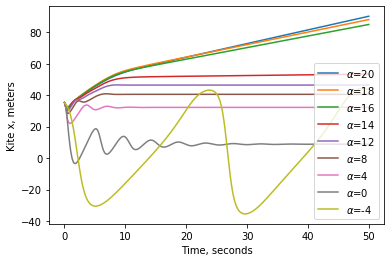

In [101]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite x, meters')
for i in range(len(traj_x)):
    plt.plot(xs, traj_x[i], label=r'$\alpha$='+str(env_params['alphas'][alphas[i]]))
plt.legend()
plt.savefig(plot_dir + "/kite_x_traj2.png", dpi=200)

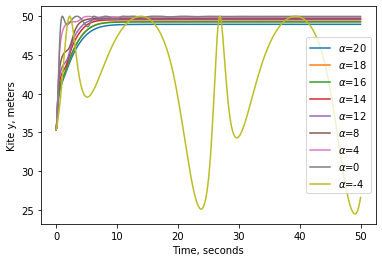

In [103]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite y, meters')
for i in range(len(traj_y)):
    plt.plot(xs, traj_y[i], label=r'$\alpha$='+str(env_params['alphas'][alphas[i]]))
plt.legend()
plt.savefig(plot_dir + "/kite_x_traj2.png", dpi=200)